In [1]:
import pandas as pd


In [2]:
findata = pd.read_csv('finance_data.csv')

In [3]:
findata.columns


Index(['coin_id', 'timestamp', 'Market Cap', 'low', 'high', 'open', 'close',
       'volume', '3m_yield', '2yr_yield', '5yr_yield', '7yr_yield',
       '10yr_yield', '30yr_yield', 'federal_funds_rate'],
      dtype='object')

In [4]:
sentiments = pd.read_csv('daily_weighted_scores.csv')

In [12]:
findata.coin_id.unique()

array(['aave', 'algo', 'atom', 'btc', 'dai', 'etc', 'eth', 'fil', 'knc',
       'link', 'snx', 'uma', 'uni', 'wbtc', 'yfi', 'zec', 'zrx'],
      dtype=object)

In [5]:
# The subset of coins that we kept after thresholding. 
coins = ['aave',
 'algo',
 'atom',
 'btc',
 'etc',
 'eth',
 'link',
 'snx',
 'uni',
 'wbtc',
 'zec']

In [6]:
# Weights of each coin, may use it as a feature. 
weights = {'btc': 0.00027398926320121655,
 'eth': 0.00030820392892985356,
 'link': 0.021573626174713055,
 'etc': 0.06210589353326485,
 'uni': 0.08539560360823917,
 'zec': 0.10564404570091444,
 'algo': 0.1164485503748716,
 'wbtc': 0.12809340541235878,
 'aave': 0.13847935720255003,
 'atom': 0.16799135136047053,
 'snx': 0.17368597344048645}

In [7]:
# Dropping the other Coins
findata = findata[findata.coin_id.isin(coins)]

In [8]:
sentiments

,created_at,neutral,positive,negative
0,2021-02-01,0.000402,0.000125,0.000055
1,2021-02-02,0.000523,0.000042,0.000017
2,2021-02-03,0.019886,0.001958,0.000311
3,2021-02-04,0.000453,0.000056,0.000073
4,2021-02-05,0.050874,0.086177,0.002010
...,...,...,...,...
810,2023-06-08,0.345967,0.045704,0.053157
811,2023-06-09,0.052689,0.009036,0.022535
812,2023-06-10,0.272347,0.023615,0.072739
813,2023-06-11,0.316415,0.044906,0.007392


In [25]:
# Take the maximum category per day as a Categorical Variable. nah
sentiments.head()

,created_at,neutral,positive,negative
0,2021-02-01,0.000402,0.000125,0.000055
1,2021-02-02,0.000523,0.000042,0.000017
2,2021-02-03,0.019886,0.001958,0.000311
3,2021-02-04,0.000453,0.000056,0.000073
4,2021-02-05,0.050874,0.086177,0.002010


In [36]:
# sentiments.created_at[15] #YMD
# findata.timestamp[30] YMD

'2021-02-16'

In [10]:
# Convert timestamps to datetime objectsa

findata['timestamp'] = pd.to_datetime(findata['timestamp'])
sentiments['created_at'] = pd.to_datetime(sentiments['created_at'])

# Sort by Dates

findata.sort_values(by='timestamp', inplace=True,ignore_index=True)
sentiments.sort_values(by='created_at', inplace=True,ignore_index=True)

In [55]:
type(sentiments.created_at)

pandas.core.series.Series

In [11]:
#datetime not timestamp objects

findata['date'] = findata['timestamp'].dt.date 
sentiments['date'] = sentiments['created_at'].dt.date

findata = findata.drop(columns='timestamp')
sentiments = sentiments.drop(columns='created_at')

In [16]:
# Merge datasets on the date

fulldata = pd.merge(findata, sentiments, on='date')
fulldata

,coin_id,Market Cap,low,high,open,close,volume,3m_yield,2yr_yield,5yr_yield,7yr_yield,10yr_yield,30yr_yield,federal_funds_rate,date,neutral,positive,negative
0,snx,2.490890e+09,16.83000,17.9022,17.21800,17.53180,9.780545e+05,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055
1,uni,5.871493e+09,16.69020,20.7500,17.74960,20.49010,6.323057e+06,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055
2,algo,5.150944e+08,0.61720,0.6674,0.65230,0.64400,4.038174e+07,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055
3,aave,3.631127e+09,284.00000,307.7300,300.42300,294.67100,8.793740e+04,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055
4,link,9.246737e+09,21.65412,23.2300,22.56886,22.89959,2.733899e+06,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,etc,2.144469e+09,14.72000,15.2900,15.09000,15.15000,7.251326e+04,5.40,4.55,3.89,3.82,3.73,3.87,5.08,2023-06-12,0.215325,0.034280,0.089585
8983,uni,3.242017e+09,3.95000,4.3110,4.05500,4.30200,2.033772e+05,5.40,4.55,3.89,3.82,3.73,3.87,5.08,2023-06-12,0.215325,0.034280,0.089585
8984,aave,7.751802e+08,50.72000,54.0200,52.15000,53.81000,1.896307e+04,5.40,4.55,3.89,3.82,3.73,3.87,5.08,2023-06-12,0.215325,0.034280,0.089585
8985,atom,2.564228e+09,8.26500,8.8410,8.44900,8.74200,3.305667e+05,5.40,4.55,3.89,3.82,3.73,3.87,5.08,2023-06-12,0.215325,0.034280,0.089585


In [20]:
# Coin weights Give information about tweet volume, and the sentiment weighting,

fulldata['coin_weight'] = fulldata['coin_id'].map(weights)

In [21]:
fulldata

,coin_id,Market Cap,low,high,open,close,volume,3m_yield,2yr_yield,5yr_yield,7yr_yield,10yr_yield,30yr_yield,federal_funds_rate,date,neutral,positive,negative,coin_weight
0,snx,2.490890e+09,16.83000,17.9022,17.21800,17.53180,9.780545e+05,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055,0.173686
1,uni,5.871493e+09,16.69020,20.7500,17.74960,20.49010,6.323057e+06,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055,0.085396
2,algo,5.150944e+08,0.61720,0.6674,0.65230,0.64400,4.038174e+07,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055,0.116449
3,aave,3.631127e+09,284.00000,307.7300,300.42300,294.67100,8.793740e+04,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055,0.138479
4,link,9.246737e+09,21.65412,23.2300,22.56886,22.89959,2.733899e+06,0.07,0.11,0.42,0.76,1.09,1.84,0.08,2021-02-01,0.000402,0.000125,0.000055,0.021574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,etc,2.144469e+09,14.72000,15.2900,15.09000,15.15000,7.251326e+04,5.40,4.55,3.89,3.82,3.73,3.87,5.08,2023-06-12,0.215325,0.034280,0.089585,0.062106
8983,uni,3.242017e+09,3.95000,4.3110,4.05500,4.30200,2.033772e+05,5.40,4.55,3.89,3.82,3.73,3.87,5.08,2023-06-12,0.215325,0.034280,0.089585,0.085396
8984,aave,7.751802e+08,50.72000,54.0200,52.15000,53.81000,1.896307e+04,5.40,4.55,3.89,3.82,3.73,3.87,5.08,2023-06-12,0.215325,0.034280,0.089585,0.138479
8985,atom,2.564228e+09,8.26500,8.8410,8.44900,8.74200,3.305667e+05,5.40,4.55,3.89,3.82,3.73,3.87,5.08,2023-06-12,0.215325,0.034280,0.089585,0.167991


In [27]:
# Second Attempt at Lag features, Grouping. Success

fulldata['prev_close'] = fulldata.groupby('coin_id')['close'].shift(1)
fulldata['prev_open'] = fulldata.groupby('coin_id')['open'].shift(1)
fulldata['prev_high'] = fulldata.groupby('coin_id')['high'].shift(1)
fulldata['prev_low'] = fulldata.groupby('coin_id')['low'].shift(1)

In [36]:
fulldata

,coin_id,Market Cap,low,high,open,close,volume,3m_yield,2yr_yield,5yr_yield,...,federal_funds_rate,date,neutral,positive,negative,coin_weight,prev_close,prev_open,prev_high,prev_low
0,snx,2.490890e+09,16.83000,17.9022,17.21800,17.53180,9.780545e+05,0.07,0.11,0.42,...,0.08,2021-02-01,0.000402,0.000125,0.000055,0.173686,NaN,NaN,NaN,NaN
1,uni,5.871493e+09,16.69020,20.7500,17.74960,20.49010,6.323057e+06,0.07,0.11,0.42,...,0.08,2021-02-01,0.000402,0.000125,0.000055,0.085396,NaN,NaN,NaN,NaN
2,algo,5.150944e+08,0.61720,0.6674,0.65230,0.64400,4.038174e+07,0.07,0.11,0.42,...,0.08,2021-02-01,0.000402,0.000125,0.000055,0.116449,NaN,NaN,NaN,NaN
3,aave,3.631127e+09,284.00000,307.7300,300.42300,294.67100,8.793740e+04,0.07,0.11,0.42,...,0.08,2021-02-01,0.000402,0.000125,0.000055,0.138479,NaN,NaN,NaN,NaN
4,link,9.246737e+09,21.65412,23.2300,22.56886,22.89959,2.733899e+06,0.07,0.11,0.42,...,0.08,2021-02-01,0.000402,0.000125,0.000055,0.021574,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,etc,2.144469e+09,14.72000,15.2900,15.09000,15.15000,7.251326e+04,5.40,4.55,3.89,...,5.08,2023-06-12,0.215325,0.034280,0.089585,0.062106,15.100,15.100,15.410,14.86
8983,uni,3.242017e+09,3.95000,4.3110,4.05500,4.30200,2.033772e+05,5.40,4.55,3.89,...,5.08,2023-06-12,0.215325,0.034280,0.089585,0.085396,4.059,4.070,4.115,4.02
8984,aave,7.751802e+08,50.72000,54.0200,52.15000,53.81000,1.896307e+04,5.40,4.55,3.89,...,5.08,2023-06-12,0.215325,0.034280,0.089585,0.138479,52.200,52.610,53.450,51.71
8985,atom,2.564228e+09,8.26500,8.8410,8.44900,8.74200,3.305667e+05,5.40,4.55,3.89,...,5.08,2023-06-12,0.215325,0.034280,0.089585,0.167991,8.445,8.248,8.519,8.12


## Feature Selection: Correlation Plot

In [38]:
corr_matrix = fulldata.corr()

/var/folders/02/ctjwmbv97xn4qlw4lrnhy6240000gn/T/ipykernel_11821/908941982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fulldata.corr()


Im going with a full correlation, instead of a by-coin evaluation. If we still had the data required, I would do it by coin for my feature selection. Since We are looking at general correlation accross all the coins, I see merit in keeping a general correlation analysis. 

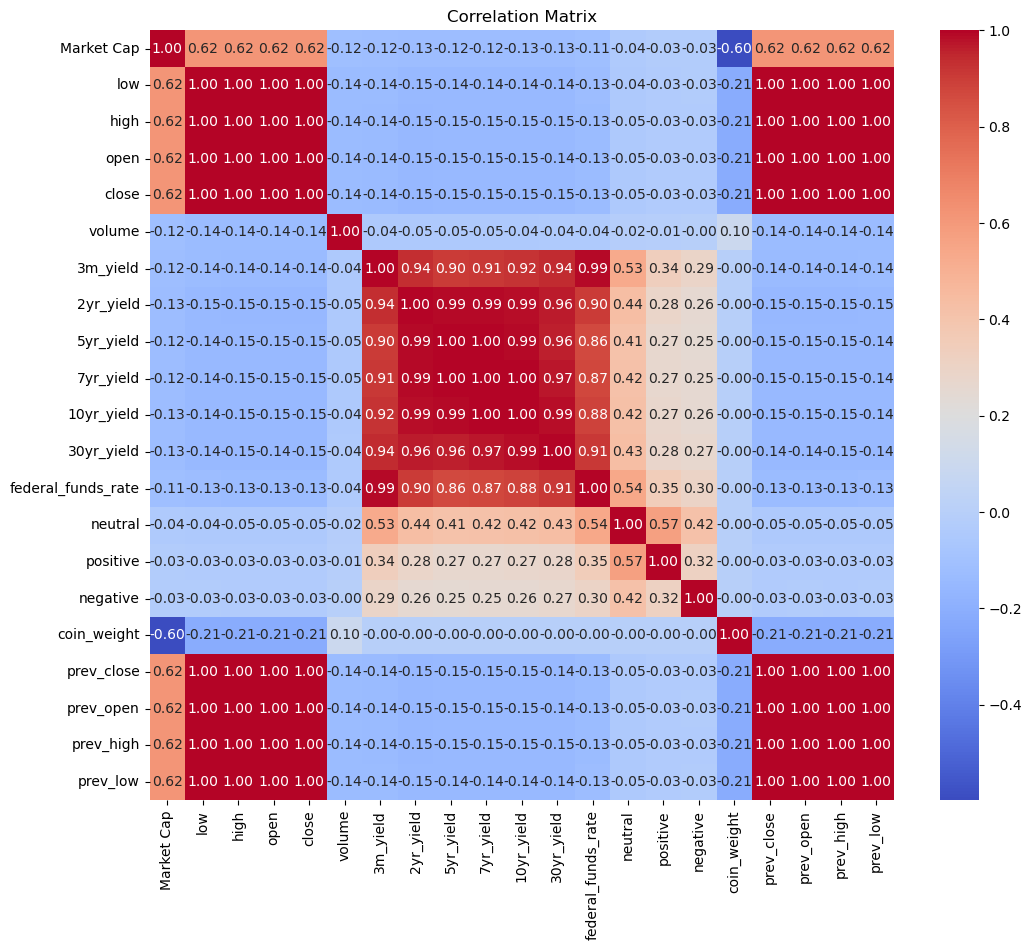

In [41]:
# Visualize my Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the fig
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, 
            annot=True,      
            fmt=".2f",       
            cmap='coolwarm') 

plt.title('Correlation Matrix')
plt.show()

Interesting note: coin_weight, the weighting that we created inversely proportional to tweet volume per coin, seems to have slight positive correlation with trading volume. 0.10. rest have negativ correlations.

Correlation with Trading Volume (0.10): A weak positive correlation of 0.10 may suggest that coins that are more prevalently spoken of (lower coin_weight) have a slight tendency to have higher trading volumes. This could mean that more popular coins on Twitter might see slightly more trading activity.

Negative Correlation with Market Cap (-0.6): A moderate negative correlation of -0.6 may imply that coins that are more prevalently spoken of tend to have a lower market capitalization. This could indicate that the sentiment on Twitter may be more focused on smaller or less established coins, which have a higher coin_weight due to being less discussed.
    
Negative Correlation with Low, High, Open, and Close (-0.21): A weak negative correlation of -0.21 with these financial metrics may mean that more prevalently spoken of coins (lower coin_weight) tend to have slightly lower values for low, high, open, and close prices. This might suggest that the sentiment or discussions on Twitter do not necessarily drive the prices of these coins in a positive direction.

________

Target: Close Price 


low, high, open, close = 1
market cap 0.62

Neutral: -0.05
Positive: -0.03
Negative: -0.03

trade volume: -0.14
2yr - 30yr yields: -0.15

coin_weight -0.21

In [43]:
# import averaged weights. I think it may be a better correlated feature in our model. 

avg_sentiments = pd.read_csv('daily_average_scores.csv')
avg_sentiments

,created_at,neutral,positive,negative
0,2021-02-01,0.681607,0.219100,0.099300
1,2021-02-02,0.897100,0.072325,0.030575
2,2021-02-03,0.633244,0.318117,0.048639
3,2021-02-04,0.786742,0.093329,0.119962
4,2021-02-05,0.534500,0.442318,0.023171
...,...,...,...,...
810,2023-06-08,0.767732,0.123735,0.108530
811,2023-06-09,0.747077,0.132968,0.119934
812,2023-06-10,0.759321,0.106608,0.134074
813,2023-06-11,0.849545,0.115255,0.035233


In [44]:
avg_sentiments.rename(columns = {'created_at':'date', 'neutral':'avg_neutral', 
                              'positive':'avg_positive','negative':'avg_negative'}, inplace = True) 
avg_sentiments

,date,avg_neutral,avg_positive,avg_negative
0,2021-02-01,0.681607,0.219100,0.099300
1,2021-02-02,0.897100,0.072325,0.030575
2,2021-02-03,0.633244,0.318117,0.048639
3,2021-02-04,0.786742,0.093329,0.119962
4,2021-02-05,0.534500,0.442318,0.023171
...,...,...,...,...
810,2023-06-08,0.767732,0.123735,0.108530
811,2023-06-09,0.747077,0.132968,0.119934
812,2023-06-10,0.759321,0.106608,0.134074
813,2023-06-11,0.849545,0.115255,0.035233


In [ ]:
# Change date object and Merge
avg_sentiments['date'] = pd.to_datetime(avg_sentiments['date'])

avg_sentiments['date'] = avg_sentiments['date'].dt.date 

fulldata2 = pd.merge(findata, avg_sentiments, on='date')

/var/folders/02/ctjwmbv97xn4qlw4lrnhy6240000gn/T/ipykernel_11821/239195250.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = fulldata2.corr()


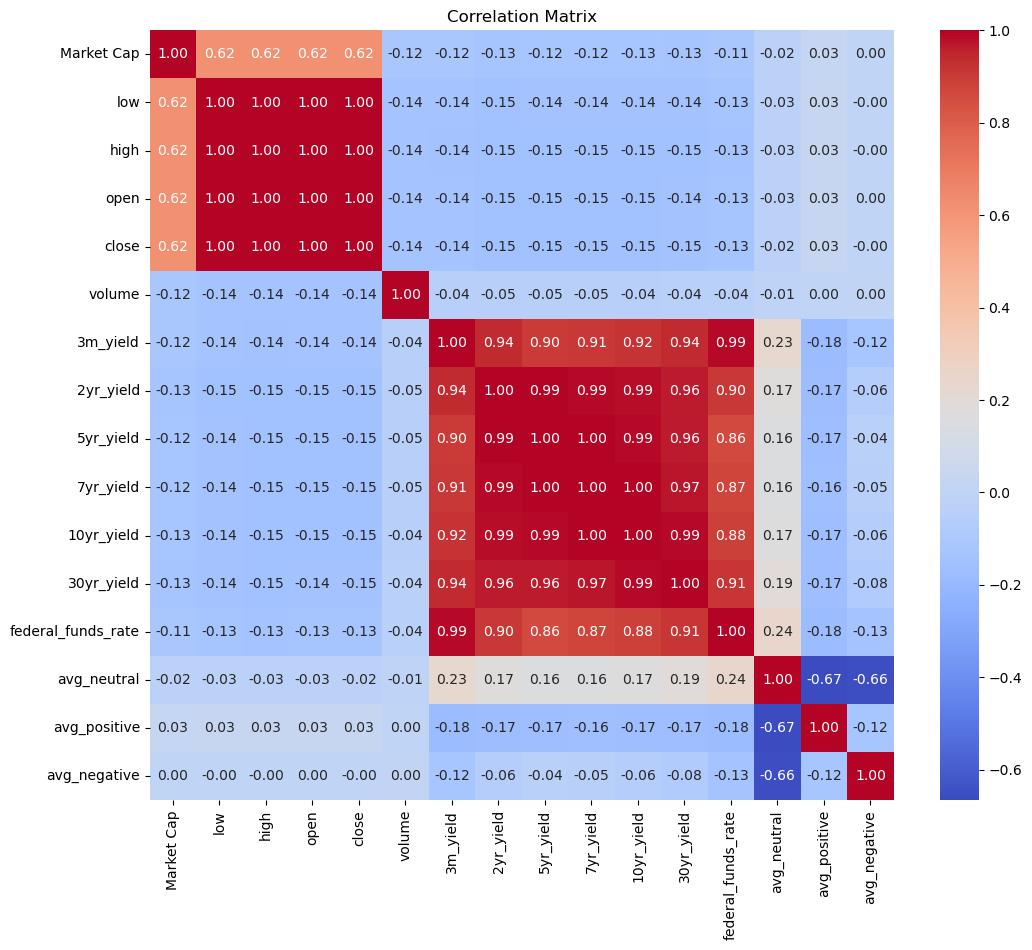

In [47]:
# Correlation on this one.

corr_matrix2 = fulldata2.corr()

# Set up the fig
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix2, 
            annot=True,      
            fmt=".2f",       
            cmap='coolwarm') 

plt.title('Correlation Matrix')
plt.show()


/var/folders/02/ctjwmbv97xn4qlw4lrnhy6240000gn/T/ipykernel_11821/3896975305.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_trial = trialdata.corr()


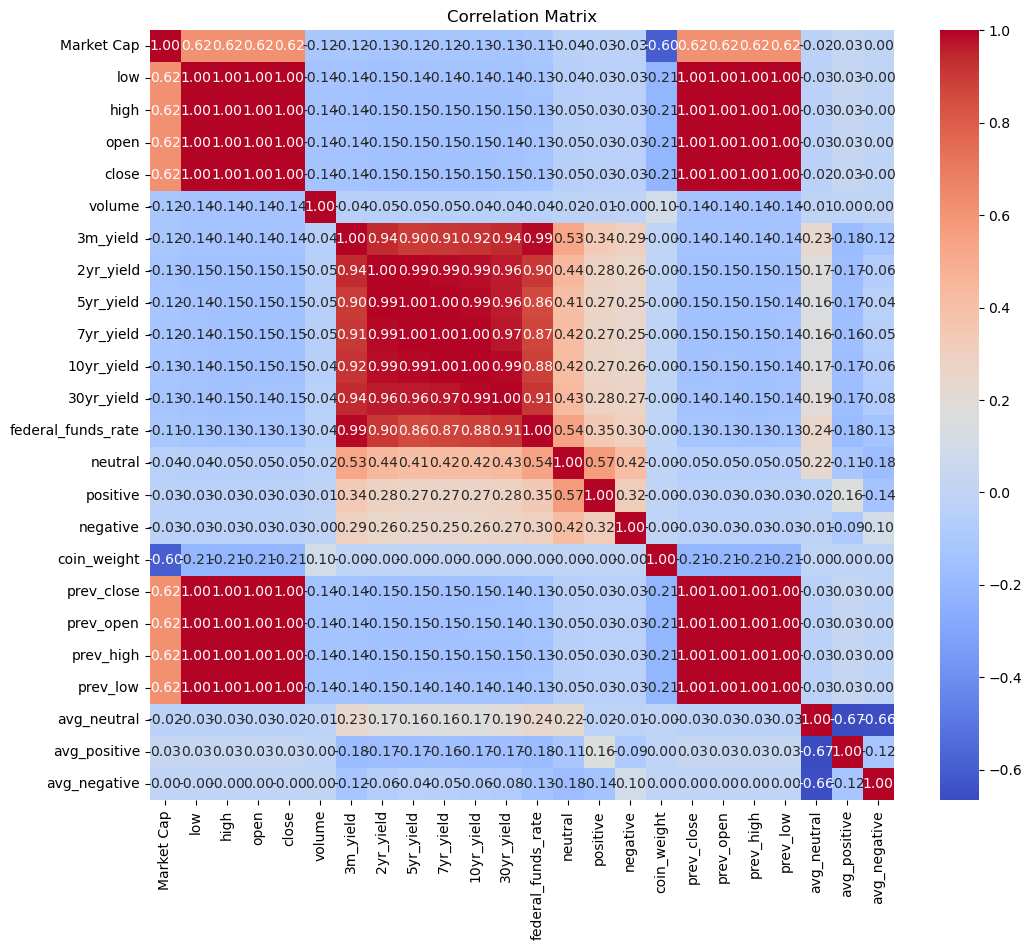

In [49]:
# Trial Run

trialdata = pd.merge(fulldata, avg_sentiments, on='date')

corr_trial = trialdata.corr()

# Set up the fig
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_trial, 
            annot=True,      
            fmt=".2f",       
            cmap='coolwarm') 

plt.title('Correlation Matrix')
plt.show()


I am not going to include the non-weighted scores, but I will keep them in my dataset. I may come back afterwards and experiment with them as a feature. 

## Building The Model


In [58]:
olddata, fulldata = fulldata, trialdata #just to hold, olddata

In [70]:
fulldata.columns

Index(['coin_id', 'Market Cap', 'low', 'high', 'open', 'close', 'volume',
       '3m_yield', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield',
       '30yr_yield', 'federal_funds_rate', 'date', 'neutral', 'positive',
       'negative', 'coin_weight', 'prev_close', 'prev_open', 'prev_high',
       'prev_low', 'avg_neutral', 'avg_positive', 'avg_negative'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
# Engineer More Features: After

# daily change in price
fulldata['daily_price_change'] = fulldata['close'] - fulldata['open']


fulldata['daily_pct_change'] = (fulldata['close'] - fulldata['prev_close']) / fulldata['prev_close']


fulldata['intraday_volatility'] = fulldata['high'] - fulldata['low']

# rolling standard deviation of closing prices over week
fulldata['7_day_rolling_vol'] = fulldata['close'].rolling(window=7).std()


In [106]:
# Drop the NaN's from the rows
fulldata.dropna(inplace=True)

# Amaris Features: (Market_cqp, high, low, open, 2yr, 5yr, 7yr,  close). Differenced and normalize.

In [107]:
fulldata.columns

Index(['coin_id', 'Market Cap', 'low', 'high', 'open', 'close', 'volume',
       '3m_yield', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield',
       '30yr_yield', 'federal_funds_rate', 'date', 'neutral', 'positive',
       'negative', 'coin_weight', 'prev_close', 'prev_open', 'prev_high',
       'prev_low', 'daily_price_change', 'daily_pct_change',
       'intraday_volatility', '7_day_rolling_vol'],
      dtype='object')

In [140]:
# List of feats to include
selected_feats = ['Market Cap', 
                     'high', 
                     'low',
                     'open',
                     'prev_open',
                     'prev_close',
                     'prev_high',
                     'prev_low',
                     '2yr_yield',
                     '5yr_yield',
                     '7yr_yield',
                    '10yr_yield',
                  'daily_price_change', 
                  'daily_pct_change',
                   'intraday_volatility', 
                  '7_day_rolling_vol']


# Selecting only the specified feats and the target var
X = fulldata[selected_feats]
y = fulldata['close']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Build the Random Forest model
rf = RandomForestRegressor(random_state=42,
                           #max_depth= 20, 
                           #max_features= 'auto',
                           n_estimators= 100)


# Train the model
rf.fit(X_train, y_train)


# Predict on the test set
y_pred = rf.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2470843.5691839047
R^2 Score: 0.9878300626746956


Bonkers. Going to see if hyperparameter tuning, feature engineering, & feature selection can improve this.
In the order of feature engineer, feature select, then hyperparameter tune. 

In [101]:
#DONT RUN
#result_list = []

In [220]:
result_list.append([f"Mean Squared Error: {mse}", 
                   f"R^2 Score: {r2}",
                    f"MAPE: {mape()}",
                   f"Features {X.columns}", 
                   f" Parameters {rf.get_params()}"])

In [142]:
result_list

[['Mean Squared Error: 55639.252302066445',
  'R^2 Score: 0.9997259534266807',
  "Features Index(['Market Cap', 'high', 'low', 'open', 'prev_open', 'prev_close',\n       'prev_high', 'prev_low', '2yr_yield', '5yr_yield', '7yr_yield'],\n      dtype='object')",
  " Parameters {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}"],
 ['Mean Squared Error: 28023.805277061645',
  'R^2 Score: 0.9998619710458032',
  "Features Index(['Market Cap', 'high', 'low', 'open', 'prev_open', 'prev_close',\n       'prev_high', 'prev_low', '2yr_yield', '5yr_yield', '7yr_yield',\n       '10yr_yield', 'daily_price_change', 'daily_pct_change',\n       'intraday_volatility', '7_day_rolling_vol

In [219]:
# Feature Importance
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                     importance
prev_low               0.447647
open                   0.362531
prev_close             0.164268
prev_high              0.018300
prev_open              0.003798
Market Cap             0.002244
daily_price_change     0.000492
daily_pct_change       0.000419
7_day_rolling_vol      0.000084
intraday_volatility    0.000067
10yr_yield             0.000057
2yr_yield              0.000045
5yr_yield              0.000030
7yr_yield              0.000017


In [124]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}



_

_

_

_


In [126]:
# Hyperparameter Tuning with GridSearch first Iteration

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30],         # Maximum number of levels in tree
    'min_samples_leaf':[1,5,10], 
    'max_leaf_nodes':[None,10,20]     
}



# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Re-evaluate the model with the best params
best_rf = grid_search.best_estimator_
best_y_pred = best_rf.predict(X_test)

best_mse = mean_squared_error(y_test, best_y_pred)
best_r2 = r2_score(y_test, best_y_pred)

print(f"Optimized Mean Squared Error: {best_mse}")
print(f"Optimized R^2 Score: {best_r2}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found:  {'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 300}
Optimized Mean Squared Error: 29651.579124400843
Optimized R^2 Score: 0.9998539535792388
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   8.1s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200; total time=  16.1s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300; total time=  25.6s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=  21.3s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=200; total time=  13.6s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=300; total time=  20.2s
[CV] END max_depth=10, max_features=auto, max_leaf_node

[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   8.1s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200; total time=  16.2s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   7.7s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   8.1s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=200; total time=  15.2s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=  21.3s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=200; total time=  13.5s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=100; total time=   3.5s
[CV] END max_depth=10, max_features=auto,

[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   8.1s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300; total time=  24.6s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   8.0s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=200; total time=  15.0s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=  21.2s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=300; total time=  20.3s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200; total time=   6.9s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200; total time=   7.1s
[CV] END max_depth=10, max_features=auto, m

[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200; total time=  16.1s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300; total time=  25.0s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=200; total time=  15.0s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=100; total time=   6.7s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=200; total time=  13.6s
[CV] END max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=300; total time=  20.2s
[CV] END max_depth=10, max_features

Best parameters found:  {'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 300}
Optimized Mean Squared Error: 29651.579124400843
Optimized R^2 Score: 0.9998539535792388

_____
Error Still Bonkers. Features/targets may need to be normalized

In [127]:
# Feature Importance 
optimized_feature_importances = pd.DataFrame(best_rf.feature_importances_, 
                                             index = X_train.columns, 
                                             columns=['importance']).sort_values('importance', ascending=False)

print(optimized_feature_importances)

# If I get new data for prediction (new_data = actual new data)
# new_predictions = best_rf.predict(new_data)


                     importance
high                   0.512899
low                    0.405321
open                   0.034678
prev_close             0.027523
prev_low               0.012695
prev_open              0.003340
Market Cap             0.002156
prev_high              0.001117
daily_price_change     0.000090
daily_pct_change       0.000075
7_day_rolling_vol      0.000026
2yr_yield              0.000019
intraday_volatility    0.000019
5yr_yield              0.000016
10yr_yield             0.000015
7yr_yield              0.000011


In [144]:
fulldata

,coin_id,Market Cap,low,high,open,close,volume,3m_yield,2yr_yield,5yr_yield,...,negative,coin_weight,prev_close,prev_open,prev_high,prev_low,daily_price_change,daily_pct_change,intraday_volatility,7_day_rolling_vol
11,atom,2.140712e+09,8.720,9.330,9.289,8.904,1.579602e+06,0.07,0.11,0.45,...,0.000017,0.167991,9.289,8.158,9.294,7.841,-0.385,-0.041447,0.610,16216.584637
12,etc,9.143137e+08,7.455,7.925,7.522,7.762,6.813645e+05,0.07,0.11,0.45,...,0.000017,0.062106,7.526,7.386,7.650,7.255,0.240,0.031358,0.470,16224.683501
13,btc,6.606641e+11,33450.000,36000.000,33534.390,35512.670,1.999584e+04,0.07,0.11,0.45,...,0.000017,0.000274,33533.190,33137.750,34728.570,32333.000,1978.280,0.059030,2550.000,16717.501946
14,eth,1.745571e+11,1360.270,1549.000,1374.550,1513.670,5.965704e+05,0.07,0.11,0.45,...,0.000017,0.000308,1374.600,1313.950,1378.020,1271.310,139.120,0.101171,188.730,13255.825698
15,zec,9.987858e+08,88.240,94.430,88.630,92.600,5.852805e+04,0.07,0.11,0.45,...,0.000017,0.105644,88.730,85.650,89.670,84.020,3.970,0.043615,6.190,13249.998452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,etc,2.144469e+09,14.720,15.290,15.090,15.150,7.251326e+04,5.40,4.55,3.89,...,0.089585,0.062106,15.100,15.100,15.410,14.860,0.060,0.003311,0.570,12499.381239
8983,uni,3.242017e+09,3.950,4.311,4.055,4.302,2.033772e+05,5.40,4.55,3.89,...,0.089585,0.085396,4.059,4.070,4.115,4.020,0.247,0.059867,0.361,12498.953314
8984,aave,7.751802e+08,50.720,54.020,52.150,53.810,1.896307e+04,5.40,4.55,3.89,...,0.089585,0.138479,52.200,52.610,53.450,51.710,1.660,0.030843,3.300,12493.655013
8985,atom,2.564228e+09,8.265,8.841,8.449,8.742,3.305667e+05,5.40,4.55,3.89,...,0.089585,0.167991,8.445,8.248,8.519,8.120,0.293,0.035169,0.576,12493.288801


In [148]:
fulldata.columns

Index(['coin_id', 'Market Cap', 'low', 'high', 'open', 'close', 'volume',
       '3m_yield', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield',
       '30yr_yield', 'federal_funds_rate', 'date', 'neutral', 'positive',
       'negative', 'coin_weight', 'prev_close', 'prev_open', 'prev_high',
       'prev_low', 'daily_price_change', 'daily_pct_change',
       'intraday_volatility', '7_day_rolling_vol'],
      dtype='object')

In [153]:
for each in fulldata.columns:
    print(f" Column: '{each}' , "f'Minimum: {min(fulldata[each])},'
         f' Maximum: {max(fulldata[each])}')

 Column: 'coin_id' , Minimum: aave, Maximum: zec
 Column: 'Market Cap' , Minimum: 204738605.1761405, Maximum: 1278797895528.3608
 Column: 'low' , Minimum: 0.0914, Maximum: 66309.91
 Column: 'high' , Minimum: 0.1132, Maximum: 69017.71
 Column: 'open' , Minimum: 0.1107, Maximum: 67554.13
 Column: 'close' , Minimum: 0.1107, Maximum: 67554.84
 Column: 'volume' , Minimum: 0.31630517, Maximum: 337299724.0
 Column: '3m_yield' , Minimum: 0.01, Maximum: 5.55
 Column: '2yr_yield' , Minimum: 0.09, Maximum: 5.05
 Column: '5yr_yield' , Minimum: 0.45, Maximum: 4.45
 Column: '7yr_yield' , Minimum: 0.79, Maximum: 4.36
 Column: '10yr_yield' , Minimum: 1.12, Maximum: 4.25
 Column: '30yr_yield' , Minimum: 1.69, Maximum: 4.4
 Column: 'federal_funds_rate' , Minimum: 0.05, Maximum: 5.08
 Column: 'date' , Minimum: 2021-02-02, Maximum: 2023-06-12
 Column: 'neutral' , Minimum: 4.657817474420682e-06, Maximum: 0.4929589286549007
 Column: 'positive' , Minimum: 4.274232505938978e-06, Maximum: 0.2597448399833043
 C

In [143]:
fulldata.columns

Index(['coin_id', 'Market Cap', 'low', 'high', 'open', 'close', 'volume',
       '3m_yield', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield',
       '30yr_yield', 'federal_funds_rate', 'date', 'neutral', 'positive',
       'negative', 'coin_weight', 'prev_close', 'prev_open', 'prev_high',
       'prev_low', 'daily_price_change', 'daily_pct_change',
       'intraday_volatility', '7_day_rolling_vol'],
      dtype='object')

I choose Robust Scaler because of the way the Outliers are handled. A more direct comparison would be to use zscorenormalization, which standardscaler uses. Since our results seem to be inconclusive, I want to be more thorough in assessing impact of additional features on our model, so I will employ a more ~Robust~ approach. 

In [159]:
# Normalization

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#
scaler = RobustScaler()  # or StandardScaler()

# Specify the columns to scale
scalercols = ['Market Cap', 'low','volume', 'high', 'open', 'close', 'volume','prev_close', 'prev_open', 'prev_high',
       'prev_low','7_day_rolling_vol', 'intraday_volatility','daily_price_change']

fulldata[scalercols] = scaler.fit_transform(fulldata[scalercols])

In [218]:
# Running After
# List of feats to include
selected_feats = ['Market Cap', 
                     #'high', very heavily involved. we want other features to stand out
                     #'low', +, a predictive model would not have the days high and low, want to determine validity excluding
                     'open',
                     'prev_open',
                     'prev_close',
                     'prev_high',
                     'prev_low',
                     '2yr_yield',
                     '5yr_yield',
                     '7yr_yield',
                    '10yr_yield',
                  #'positive',
                  #'negative',
                  #'neutral',
                  'daily_price_change', 
                  'daily_pct_change',
                   'intraday_volatility', 
                  '7_day_rolling_vol']


# Selecting only the specified feats and the target var
X = fulldata[selected_feats]
y = fulldata['close']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Build the model
rf = RandomForestRegressor(random_state=42,
                           #max_depth= 20, 
                           #max_features= 'auto',
                           n_estimators= 100)


# Train the model
rf.fit(X_train, y_train)


# Predict on the test set
y_pred = rf.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.01354460738241811
R^2 Score: 0.99983574466859


In [194]:
result_list[-1]

['Mean Squared Error: 0.02606712480400051',
 'R^2 Score: 0.999683884212905',
 'MAPE: 4.722853729588623',
 "Features Index(['Market Cap', 'open', 'prev_open', 'prev_close', 'prev_high',\n       'prev_low', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield',\n       'daily_price_change', 'daily_pct_change', 'intraday_volatility',\n       '7_day_rolling_vol'],\n      dtype='object')",
 " Parameters {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}"]

first model after scale mape : 0.031364502184911734

In [166]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.031364502184911734

In [173]:
import numpy as np

# AP Metrics
def mape(y_true = y_test, y_pred = y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-6))) * 100

mape()

2.9486147489751304

## After I Feature Engineer/Normalize: HyperParameter Tuning


In [177]:
from sklearn.model_selection import GridSearchCV
# to see if i can now improve my scores. 

In [179]:
# Hyperparameter Tuning with GridSearch. After Normalization.

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [1, 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],         # Maximum number of levels in tree
    'min_samples_leaf':[1,5,10], 
    'max_leaf_nodes':[None,10,20]     
}



# Instantiate grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Re-evaluate the model with the best params
best_rf = grid_search.best_estimator_
best_y_pred = best_rf.predict(X_test)

best_mse = mean_squared_error(y_test, best_y_pred)
best_r2 = r2_score(y_test, best_y_pred)
best_mape = mape(y_test,best_y_pred)

print(f"Optimized Mean Squared Error: {best_mse}")
print(f"Optimized R^2 Score: {best_r2}")
print(f"Optimized MAPE Score: {best_mape}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300; total time=   2.9s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=   2.8s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV

[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_

[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300; total time=   2.9s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_

[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300; total time=   3.0s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_sampl

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Optimized Mean Squared Error: 0.02606712480400051
Optimized R^2 Score: 0.999683884212905
Optimized MAPE Score: 4.722853729588623
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=1

[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_samples_leaf=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=10, min_samples_leaf=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=300; total time=   1.8s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=10

[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=300; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=200; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, m

[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=1, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=300; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=300; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=200; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, n_estimators=300; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, n_estimators=300; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, max_l

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Optimized Mean Squared Error: 0.02606712480400051
Optimized R^2 Score: 0.999683884212905
Optimized MAPE Score: 4.722853729588623

'---------

In [183]:
# Append Best to List

result_list.append([f"Mean Squared Error: {best_mse}", 
                   f"R^2 Score: {best_r2}",
                    f"MAPE: {best_mape}",
                   f"Features {X.columns}", 
                   f" Parameters {best_rf.get_params()}"])

['Mean Squared Error: 0.01354460738241811',
 'R^2 Score: 0.99983574466859',
 'MAPE: 2.9486147489751304',
 "Features Index(['Market Cap', 'open', 'prev_open', 'prev_close', 'prev_high',\n       'prev_low', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield',\n       'daily_price_change', 'daily_pct_change', 'intraday_volatility',\n       '7_day_rolling_vol'],\n      dtype='object')",
 " Parameters {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}"]

In [191]:
# most optimal is the one on defaults:
def_nosent = result_list[-2]

In [198]:
# get sent scores included on defaults and see performance.
def_sent = result_list[-1]

In [201]:
def_sent

['Mean Squared Error: 0.013806327736119261',
 'R^2 Score: 0.9998325707882242',
 'MAPE: 2.9486147489751304',
 "Features Index(['Market Cap', 'open', 'prev_open', 'prev_close', 'prev_high',\n       'prev_low', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield',\n       'positive', 'negative', 'neutral', 'daily_price_change',\n       'daily_pct_change', 'intraday_volatility', '7_day_rolling_vol'],\n      dtype='object')",
 " Parameters {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}"]

In [214]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [223]:
result_list[-2]

['Mean Squared Error: 0.013806327736119261',
 'R^2 Score: 0.9998325707882242',
 'MAPE: 2.9486147489751304',
 "Features Index(['Market Cap', 'open', 'prev_open', 'prev_close', 'prev_high',\n       'prev_low', '2yr_yield', '5yr_yield', '7yr_yield', '10yr_yield',\n       'positive', 'negative', 'neutral', 'daily_price_change',\n       'daily_pct_change', 'intraday_volatility', '7_day_rolling_vol'],\n      dtype='object')",
 " Parameters {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}"]

In [238]:
# Save my results_list to my .txt file


with open('./forest_results.txt', 'w') as f:
    
    for sublist in result_list:
        
        # Write each string to a new line
        for item in sublist:
            f.write(item + '\n')
            
        # Write the separator
        f.write('---------\n')


Due to Time Constraints, this exploration will end here. We have enough information to infer that the sentiment data, in its present form, does not lend any robustness to the model. In fact, the model performs very slightly worse. (~ a 0.0003 increase in MSE, and a similar decrease in R^2 when implementing the scores.) The very high R^2 may be a symptom of overfitting, as the most important features in both models - even after excluding current day high and low- are very directly correlated with the close price. Furthermore, our feature importance analysis indicates that among the features in the model, the sentiments rank least in significance, suggesting that they do not contribute. 

Future Directions: 

Alternate Sentiment Score Calculation Method may be considered. An aggregation, so that all 3 are treated as one feature. Or an alternate calculation factoring in a diffferent weighting. 

More Data, or Less Coins:
Ideally, the distribution of coins to time would be more dispersed, in order to more easily distinguish any results. A potential future direction explored was a bitcoin and etheruem Specific study, since they are considered of the moset widespread used/accepted. 

Coin Type:
An analysis of various coin usages and types, and how their usage may impact how much sentiment score affects, or is correlated with, their financial metrics. 